# Objective- Apply SVM on amazon fine food review using featurization Bag of Words

This ipynb file contains the code for-

* GridSearchCV on SVC for BoW
* RandomizedSearchCV on SVC for BoW
* GridSearchCV on SGDClassifier for BoW

In [3]:
import sqlite3
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the data

In [5]:
import sqlite3
import numpy as np
import pandas as pd

In [6]:
sample_data=pd.read_csv('sample_svm.csv')

In [7]:
len(sample_data)

50000

In [8]:
#taking the test data seperate from all other

X, x_test, y_train, y_test=train_test_split(sample_data['Cleaned_text'], sample_data['Score'], test_size=0.3) #splitting the data

In [9]:
# this function plot mse vs C plot, predicting accuracy, confusion matrix and classification report

def svm_plot(clf, x_train, y_train, x_test, y_test):
          
    #predicting y and accuracy
    y_pred=clf.predict(x_test)
    accu=accuracy_score(y_pred,y_test)*100
    print('accuracy=',accu)
    print('**********************************************************************\n')
    
    #confusion matrix
    t=confusion_matrix(y_pred,y_test)
    print('confusion matrix--')
    #print(t)
    #print('**********************************************************************')
    sns.heatmap(t, annot=True, fmt="d", xticklabels=True, yticklabels=True)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.title('confusion matrix')
    plt.show()
    print('**********************************************************************\n')
    
    # finding TPR , TNR, FPR, FNR
    TNR=t[0][0]/(t[0][0]+t[1][0])
    TPR=t[1][1]/(t[0][1]+t[1][1])
    FPR=t[1][0]/(t[0][0]+t[1][0])
    FNR=t[0][1]/(t[0][1]+t[1][1])
    print('TNR=',TNR)
    print('TPR=',TPR)
    print('FPR=',FPR)
    print('FNR=',FNR)
    print('**********************************************************************\n')
    
    
    #classification report
    print(classification_report(y_pred,y_test))
    print('**********************************************************************\n')
    
    
    return accu, TNR, TPR, FPR, FNR

##  SVC for BoW

In [10]:
count_vect=CountVectorizer()
x_train_bow=count_vect.fit_transform(X.values)

In [11]:
x_test_bow=count_vect.transform(x_test.values)

In [12]:
from sklearn.preprocessing import normalize

x_train_bow=normalize(x_train_bow)
x_test_bow=normalize(x_test_bow)


## Applying Gridsearchcv on SVC 

In [13]:
from sklearn.svm import SVC

tscv=TimeSeriesSplit(n_splits=10)
gamma=[0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
param={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 150, 200], 'gamma':gamma}
clf=SVC()
clf=GridSearchCV(estimator=clf, param_grid=param, cv=tscv,  n_jobs=-1, verbose=1)

In [14]:
# fitting the model
%time
start=datetime.now()
clf.fit(x_train_bow,y_train)
end=datetime.now()
print('duration = ',(end-start))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.7 µs
Fitting 10 folds for each of 130 candidates, totalling 1300 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed: 100.7min
[Parallel(n_jobs=-1)]: Done 1210 tasks      | elapsed: 225.9min
[Parallel(n_jobs=-1)]: Done 1300 out of 1300 | elapsed: 274.6min finished


duration =  4:36:51.277296


In [15]:
import pickle
pickle.dump(clf,open('svm_bow_grid.p','wb'))

In [16]:
# best value of C
c=clf.best_estimator_.get_params()['C']
gamma=clf.best_estimator_.get_params()['gamma']
print('best C=',c)
print('best penalty=',gamma)

best C= 200
best penalty= 0.005


accuracy= 91.94666666666666
**********************************************************************

confusion matrix--


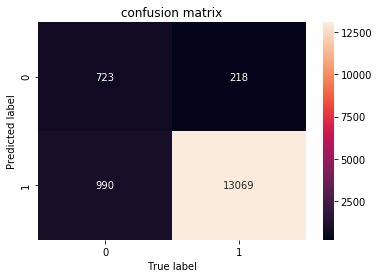

**********************************************************************

TNR= 0.4220665499124343
TPR= 0.983592985625047
FPR= 0.5779334500875657
FNR= 0.016407014374952962
**********************************************************************

             precision    recall  f1-score   support

          0       0.42      0.77      0.54       941
          1       0.98      0.93      0.96     14059

avg / total       0.95      0.92      0.93     15000

**********************************************************************



In [18]:
accu, TNR, TPR, FPR, FNR=svm_plot(clf=clf, x_train=x_train_bow, y_train=y_train, x_test=x_test_bow, y_test=y_test)

## Applying randomizedsearchcv on SVC

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

tscv=TimeSeriesSplit(n_splits=10)
gamma=[0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
param={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 150, 200], 'gamma':gamma}
clf=SVC()
clf=RandomizedSearchCV(estimator=clf, param_distributions=param,cv=tscv, n_jobs=-1)

In [16]:
# fitting the model
%time
start=datetime.now()
clf.fit(x_train_bow,y_train)
end=datetime.now()
print('duration = ',(end-start))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.2 µs
duration =  0:23:01.517211


In [29]:
import pickle
pickle.dump(clf,open('svm_bow_random.p','wb'))

In [17]:
# best value of C
c=clf.best_estimator_.get_params()['C']
gamma=clf.best_estimator_.get_params()['gamma']
print('best C=',c)
print('best penalty=',gamma)

best C= 150
best penalty= 0.05


accuracy= 91.75999999999999
**********************************************************************

confusion matrix--


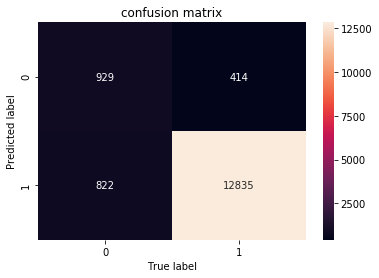

**********************************************************************

TNR= 0.5305539691604797
TPR= 0.9687523586685788
FPR= 0.4694460308395203
FNR= 0.03124764133142124
**********************************************************************

             precision    recall  f1-score   support

          0       0.53      0.69      0.60      1343
          1       0.97      0.94      0.95     13657

avg / total       0.93      0.92      0.92     15000

**********************************************************************



In [18]:
accu, TNR, TPR, FPR, FNR=svm_plot(clf=clf, x_train=x_train_bow, y_train=y_train, x_test=x_test_bow, y_test=y_test)

## Using SGDClassifier with hinge loss

In [23]:
from sklearn.linear_model import SGDClassifier

tscv=TimeSeriesSplit(n_splits=10)
penalty=['l1', 'l2']
param={'alpha': [0.000001, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50], 'penalty':penalty}
clf=SGDClassifier()
clf=GridSearchCV(estimator=clf, param_grid=param, cv=tscv,  n_jobs=1, verbose=1)

In [24]:
# fitting the model
%time
start=datetime.now()
clf.fit(x_train_bow,y_train)
end=datetime.now()
print('duration = ',(end-start))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 13.6 µs
Fitting 10 folds for each of 30 candidates, totalling 300 fits
duration =  0:00:11.378013


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   11.3s finished


In [25]:
# best value of C
penalty=clf.best_estimator_.get_params()['penalty']
alpha=clf.best_estimator_.get_params()['alpha']
print('best alpha=',alpha)
print('best penalty=',penalty)

best alpha= 5e-05
best penalty= l2


accuracy= 91.56
**********************************************************************

confusion matrix--


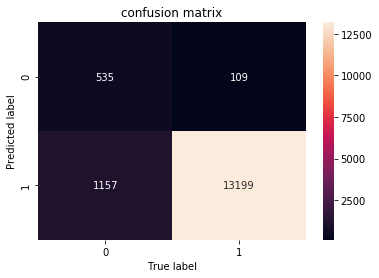

**********************************************************************

TNR= 0.31619385342789597
TPR= 0.9918094379320709
FPR= 0.683806146572104
FNR= 0.008190562067929065
**********************************************************************

             precision    recall  f1-score   support

          0       0.32      0.83      0.46       644
          1       0.99      0.92      0.95     14356

avg / total       0.96      0.92      0.93     15000

**********************************************************************



In [26]:
accu, TNR, TPR, FPR, FNR=svm_plot(clf=clf, x_train=x_train_bow, y_train=y_train, x_test=x_test_bow, y_test=y_test)

## Performance Table

| sno | featurization | model algo | cv algo | best C | best gamma | accuracy | TNR | TPR | f1-score |
|-----|----------------|---------------|--------------------|-------------|------------|----------|--------|--------|----------|
| 1 | BoW | SVC | GridSearchCV | 200 | 0.005 | 91.9466 | 0.4220 | 0.9835 | 0.93 |
| 2 | BoW | SVC | RandomizedSearchCV | 150 | 0.05 | 91.7599 | 0.5305 | 0.9687 | 0.92 |


| sno | featurization | model algo | cv algo | best alpha | best penalty | accuracy | TNR | TPR | f1-score |
|-----|---------------|---------------|--------------|------------|--------------|----------|--------|--------|----------|
| 1 | BoW | SGDClassifier | GridSearchCV | 5e-05 | l2 | 91.56 | 0.3161 | 0.9918 | 0.93 |

## Observation-
* Both SVC and SGDClassifier have approximately same accuracy and f1-score
* SVC works well for BoW